In [1]:
from large_gcs.contact.contact_location import *
from large_gcs.contact.contact_pair_mode import *
from large_gcs.contact.rigid_body import *
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.contact_graph import ContactGraph
import random

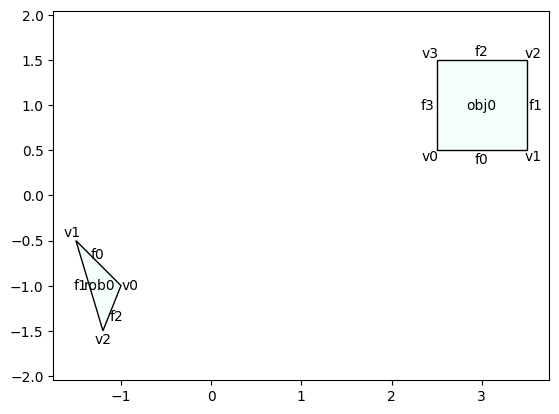

In [2]:
# 2 items
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]

# # 2 movable items
obs_vertices = []
obj_vertices = [np.array([[0, 0], [1, 0], [1, 1], [0, 1]]) + np.array([2.5, 0.5])]
rob_vertices = [np.array([[-1, -1], [-1.5, -0.5], [-1.2, -1.5]])]
source_obj_pos = [[1, 1]]
source_rob_pos = [[-1, -1]]
target_obj_pos = [[-1, -1]]
target_rob_pos = [[1, 1]]

# 3 items
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]

# # 3 boxes
# obs_vertices = [
#     np.array([[0, 0], [2, 0], [2, 1], [0,1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[0, 0], [0.5, 0], [0.5, 0.5], [0,0.5]]) + np.array([0,-1])
# ]

# # 4 items
# obs_vertices = [
#     np.array([[0, 0], [1, 0], [0, -1]])
# ]
# obj_vertices = [
#     np.array([[0, 0], [1, 0], [1, -0.5]]) + np.array([1.5, 0]),
#     np.array([[0, 0], [1, 0], [1, 1], [0,1]]) + np.array([2.5,0.5])
# ]
# rob_vertices = [
#     np.array([[-1,-1],[-1.5,-0.5],[-1.2, -1.5]])
# ]
obs = []
objs = []
robs = []
for i in range(len(obs_vertices)):
    obs.append(
        RigidBody(
            name=f"obs{i}",
            geometry=Polyhedron.from_vertices(obs_vertices[i]),
            mobility_type=MobilityType.STATIC,
        )
    )
for i in range(len(obj_vertices)):
    objs.append(
        RigidBody(
            name=f"obj{i}",
            geometry=Polyhedron.from_vertices(obj_vertices[i]),
            mobility_type=MobilityType.UNACTUATED,
        )
    )
for i in range(len(rob_vertices)):
    robs.append(
        RigidBody(
            name=f"rob{i}",
            geometry=Polyhedron.from_vertices(rob_vertices[i]),
            mobility_type=MobilityType.ACTUATED,
        )
    )
all_rigid_bodies = obs + objs + robs

for rigid_body in all_rigid_bodies:
    rigid_body.plot()

In [3]:
contact_graph = ContactGraph(
    obs, objs, robs, source_obj_pos, source_rob_pos, target_obj_pos, target_rob_pos
)

print(contact_graph.params)

Generating contact sets for 2 bodies...
Generating contact pair modes for 1 body pairs...


100%|██████████| 1/1 [00:00<00:00, 45.16it/s]


Each body pair has on average 11.0 modes
Generating contact sets for 11 sets...


100%|██████████| 11/11 [00:00<00:00, 5176.41it/s]


Pruning empty sets...


100%|██████████| 11/11 [00:00<00:00, 90.67it/s]

11 sets remain after removing 0 empty sets
Generating edges...(parallel)



100%|██████████| 78/78 [00:02<00:00, 30.82it/s]


24 edges generated
GraphParams(dim=8, n_vertices=13, n_edges=24, source=[[1, 1], [-1, -1]], target=[[-1, -1], [1, 1]], workspace=None, default_costs_constraints=DefaultGraphCostsConstraints(vertex_costs=[<pydrake.solvers.L2NormCost object at 0x186feaf30>], vertex_constraints=[], edge_costs=[], edge_constraints=[<pydrake.solvers.LinearEqualityConstraint object at 0x186ff4e30>]))


In [4]:
sol = contact_graph.solve()

In [8]:
print(sol.path)

[('s', array([ 1.,  1.,  1.,  1., -1., -1., -1., -1.])), ("('NC:obj0_f3-rob0_v0',)", array([ 1.79033314,  1.26111051,  1.2105156 ,  0.68129598, -0.5566037 ,
       -0.02738106, -1.13491185, -0.60568917])), ("('NC:obj0_f2-rob0_v2',)", array([-0.31811205, -1.25345105, -0.90312664, -1.83847186, -0.35702895,
        0.57831006, -0.93533788,  0.        ])), ("('NC:obj0_f1-rob0_v1',)", array([-1.83176111e+00, -2.26615782e+00, -1.83847186e+00, -2.27286868e+00,
        1.86308746e-11,  4.34396711e-01,  1.94846361e-11,  4.34396653e-01])), ('t', array([-1., -1., -1., -1.,  1.,  1.,  1.,  1.]))]
